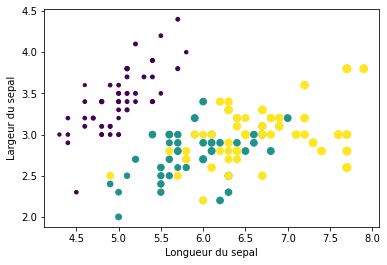

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, s=X[:, 2]*10)
plt.xlabel('Longueur du sepal')
plt.ylabel('Largeur du sepal')
plt.show()

Text(0.5, 1.0, 'TEST SET')

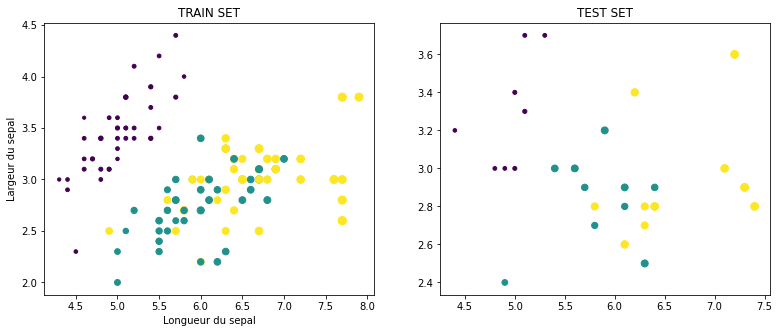

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=X_train[:, 2]*10)
plt.title('TRAIN SET')
plt.xlabel('Longueur du sepal')
plt.ylabel('Largeur du sepal')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=X_test[:, 2]*10)
plt.title('TEST SET')

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9666666666666667


In [4]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(5), X_train, y_train, cv=5, scoring="accuracy").mean()

0.9833333333333334

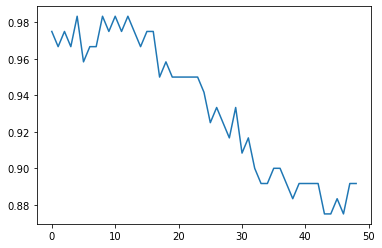

In [5]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
    
plt.plot(val_score)

In [6]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)
train_score.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(49, 5)

In [7]:
train_score.mean(axis=1)

array([1.        , 0.98333333, 0.97916667, 0.97708333, 0.98125   ,
       0.975     , 0.97708333, 0.97291667, 0.97708333, 0.975     ,
       0.97708333, 0.97291667, 0.97708333, 0.97291667, 0.975     ,
       0.96666667, 0.96666667, 0.9625    , 0.96041667, 0.95625   ,
       0.95833333, 0.95833333, 0.96041667, 0.95625   , 0.95833333,
       0.95208333, 0.95      , 0.93541667, 0.93958333, 0.93541667,
       0.93958333, 0.93125   , 0.92291667, 0.91666667, 0.925     ,
       0.91666667, 0.9125    , 0.91458333, 0.91666667, 0.91458333,
       0.91041667, 0.91041667, 0.90625   , 0.89791667, 0.90208333,
       0.90208333, 0.90416667, 0.89791667, 0.89791667])

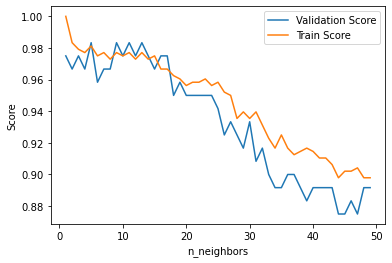

In [8]:
plt.plot(k, val_score.mean(axis=1), label="Validation Score")
plt.plot(k, train_score.mean(axis=1), label="Train Score")
plt.ylabel('Score')
plt.xlabel('n_neighbors')
plt.legend()

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20),
              'metric': ['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [13]:
grid.best_score_

0.9833333333333334

In [14]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [15]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [43]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 10), cv=5)

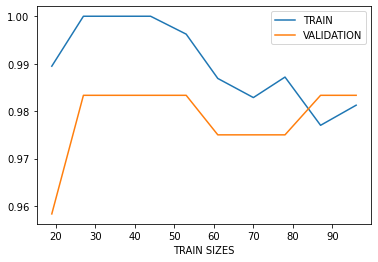

In [47]:
plt.plot(N, train_score.mean(axis=1), label='TRAIN')
plt.plot(N, val_score.mean(axis=1), label='VALIDATION')
plt.xlabel('TRAIN SIZES')
plt.legend()